# Practical Application III: Comparing Classifiers

**Overview**: In this practical application, your goal is to compare the performance of the classifiers we encountered in this section, namely K Nearest Neighbor, Logistic Regression, Decision Trees, and Support Vector Machines.  We will utilize a dataset related to marketing bank products over the telephone.  



### Getting Started

Our dataset comes from the UCI Machine Learning repository [link](https://archive.ics.uci.edu/ml/datasets/bank+marketing).  The data is from a Portugese banking institution and is a collection of the results of multiple marketing campaigns.  We will make use of the article accompanying the dataset [here](CRISP-DM-BANK.pdf) for more information on the data and features.



### Problem 1: Understanding the Data

To gain a better understanding of the data, please read the information provided in the UCI link above, and examine the **Materials and Methods** section of the paper.  How many marketing campaigns does this data represent?

In [1]:
The dataset includes information on various attributes related to the clients and the specifics of each contact, such as age , job, marital sttaus, education and details about the contact itself.However , the dataset does not explicitly specify the number of distinct marketing campaigns conducted during this period.The data is orgaized at the level of individual client contacts, and while it includes features like the date of the last contact and the number of contacts, it does not delineate separate campaigns. Therefore based on the available information in the dataset , it is not possible to determine the exact number of distinct marketing campaigns represented.

SyntaxError: invalid syntax (1285496879.py, line 1)

### Problem 2: Read in the Data

Use pandas to read in the dataset `bank-additional-full.csv` and assign to a meaningful variable name.

In [4]:
import pandas as pd

In [8]:
df = pd.read_csv('bank-additional-full.csv', sep = ';')

In [10]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


### Problem 3: Understanding the Features


Examine the data description below, and determine if any of the features are missing values or need to be coerced to a different data type.


```
Input variables:
# bank client data:
1 - age (numeric)
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: has credit in default? (categorical: 'no','yes','unknown')
6 - housing: has housing loan? (categorical: 'no','yes','unknown')
7 - loan: has personal loan? (categorical: 'no','yes','unknown')
# related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
# other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14 - previous: number of contacts performed before this campaign and for this client (numeric)
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
# social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17 - cons.price.idx: consumer price index - monthly indicator (numeric)
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')
```



In [29]:
import pandas as pd 


# Load the dataset
df = pd.read_csv('bank.csv' , sep = ';')# UCI Bank dataset uses semicolons
df.head()

# Replace 'unknown' values with NaN
df.replace('unknown', pd.NA , inplace = True)

# Convert categorical columns to category dtype 
# List of known categorical columns
all_possible_categoricals = ['job' , 'marital' , 'education', 'default','housing', 'loan', 'contact', 'month' , 'day_of_week', 'poutcome']

#keep only those that exist in the DataFrame
categorical_cols = [col for col in all_possible_categoricals if col in df.columns]
        
# Convert target variable y to binary
df['y'] = df['y'].map({'yes': 1, 'no': 0})

# Confirm numeric columns are correctly typed
numeric_cols = [ 'age' , 'duration' , 'campaign' 'pdays', 'previous' , 'emp.var.rate' , 'cons.price.idx' , 'cons.conf.idx' , 'euribor3m', 'nr.employed']

for col in numeric_cols:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col] , errors = 'coerce')

# Drop missing values
df.dropna(inplace=True) # Drop rows with missing values

#Encode categorical variables with one - hot encoding 
df = pd.get_dummies(df , columns = categorical_cols , drop_first = True)


### Problem 4: Understanding the Task

After examining the description and data, your goal now is to clearly state the *Business Objective* of the task.  State the objective below.

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 764 entries, 1 to 4520
Data columns (total 39 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   age                  764 non-null    int64
 1   balance              764 non-null    int64
 2   day                  764 non-null    int64
 3   duration             764 non-null    int64
 4   campaign             764 non-null    int64
 5   pdays                764 non-null    int64
 6   previous             764 non-null    int64
 7   y                    764 non-null    int64
 8   job_blue-collar      764 non-null    bool 
 9   job_entrepreneur     764 non-null    bool 
 10  job_housemaid        764 non-null    bool 
 11  job_management       764 non-null    bool 
 12  job_retired          764 non-null    bool 
 13  job_self-employed    764 non-null    bool 
 14  job_services         764 non-null    bool 
 15  job_student          764 non-null    bool 
 16  job_technician       764 non-n

In [ ]:
Business Objective :

The goal of this task is to predict whether a client will subscribe to a term deposit following a direct marketing campaign conducted by a Portuguese bank.

By building a predictive model using historical data from previous campaigns, the bank aims to :
1. Improve targeting efficiency
2. Optimize marketing resources
3. Increase overall subscription rates.

### Problem 5: Engineering Features

Now that you understand your business objective, we will build a basic model to get started.  Before we can do this, we must work to encode the data.  Using just the bank information features, prepare the features and target column for modeling with appropriate encoding and transformations.

In [34]:
import pandas as pd

# Load dataset 
df = pd.read_csv("bank.csv", sep=';')

# Replace 'unknown' with NaN for handling later
df.replace('unknown', pd.NA, inplace=True)

# Select only bank client-related features
bank_features = ['age', 'job', 'marital', 'education', 'default', 'housing', 'loan']
df_bank = df[bank_features + ['y']].copy()

# Convert categorical variables to category dtype
categorical_cols = ['job', 'marital', 'education', 'default', 'housing', 'loan']
for col in categorical_cols:
    df_bank[col] = df_bank[col].astype('category')

# Encode categorical variables using one-hot encoding
df_bank_encoded = pd.get_dummies(df_bank, columns=categorical_cols, drop_first=True)

# Encode the target column
df_bank_encoded['y'] = df_bank_encoded['y'].map({'yes': 1, 'no': 0})

# Define features and target
X = df_bank_encoded.drop('y', axis=1)
y = df_bank_encoded['y']

# Check the shape of the resulting data
print("Features shape:", X.shape)
print("Target shape:", y.shape)
X.head()

Features shape: (4521, 18)
Target shape: (4521,)


,age,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,marital_married,marital_single,education_secondary,education_tertiary,default_yes,housing_yes,loan_yes
0,30,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False
1,33,False,False,False,False,False,False,True,False,False,False,True,False,True,False,False,True,True
2,35,False,False,False,True,False,False,False,False,False,False,False,True,False,True,False,True,False
3,30,False,False,False,True,False,False,False,False,False,False,True,False,False,True,False,True,True
4,59,True,False,False,False,False,False,False,False,False,False,True,False,True,False,False,True,False


### Problem 6: Train/Test Split

With your data prepared, split it into a train and test set.

In [42]:
from sklearn.model_selection import train_test_split

#Split the data (80 % training , 20% testing)
X_train , X_test , y_train , y_test = train_test_split(X , y, test_size = 0.2 , random_state = 42)

### Problem 7: A Baseline Model

Before we build our first model, we want to establish a baseline.  What is the baseline performance that our classifier should aim to beat?

In [46]:
#Calculate the baseline accuracy by predicting the most frequent class
baseline_accuracy = y.value_counts(normalize = True).max()

print(f"Baseline accuracy (majority class):  {baseline_accuracy:.4f}")

Baseline accuracy (majority class):  0.8848


In [ ]:
Our classifier must beat 88.5 % accuracy to be considered better than just guessing the majority class.

### Problem 8: A Simple Model

Use Logistic Regression to build a basic model on your data.  

In [49]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score , classification_report , confusion_matrix

#Initialize and train the model
model = LogisticRegression(max_iter = 1000 , class_weight = 'balanced') 
model.fit(X_train , y_train)

#Make predictions
y_pred = model.predict(X_test)

#Evaluate accuracy
print("Accuracy:" , accuracy_score(y_test, y_pred))

#Detailed performance
print("\nClassification Report : \n" , classification_report(y_test, y_pred))

#Confusion Matrix
print("\n Confusion <Matrix :\n", confusion_matrix(y_test , y_pred))

y_probs = model.predict_proba(X_test)[: , 1] #Probabilities of class 1 (yes)


Accuracy: 0.6022099447513812

Classification Report : 
               precision    recall  f1-score   support

           0       0.91      0.62      0.73       807
           1       0.13      0.47      0.20        98

    accuracy                           0.60       905
   macro avg       0.52      0.54      0.47       905
weighted avg       0.82      0.60      0.68       905


 Confusion <Matrix :
 [[499 308]
 [ 52  46]]


### Problem 9: Score the Model

What is the accuracy of your model?

In [ ]:
Accuracy: 0.6022099447513812

### Problem 10: Model Comparisons

Now, we aim to compare the performance of the Logistic Regression model to our KNN algorithm, Decision Tree, and SVM models.  Using the default settings for each of the models, fit and score each.  Also, be sure to compare the fit time of each of the models.  Present your findings in a `DataFrame` similar to that below:

| Model | Train Time | Train Accuracy | Test Accuracy |
| ----- | ---------- | -------------  | -----------   |
|     |    |.     |.     |

In [51]:
import time
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

# Store results
results = {
    'Model': [],
    'Train Accuracy': [],
    'Test Accuracy': [],
    'Fit Time (s)': []
}

# Helper function
def evaluate_model(model, name):
    start = time.time()
    model.fit(X_train, y_train)
    fit_time = time.time() - start

    train_acc = accuracy_score(y_train, model.predict(X_train))
    test_acc = accuracy_score(y_test, model.predict(X_test))

    results['Model'].append(name)
    results['Train Accuracy'].append(round(train_acc, 4))
    results['Test Accuracy'].append(round(test_acc, 4))
    results['Fit Time (s)'].append(round(fit_time, 4))

# Evaluate all models
evaluate_model(LogisticRegression(max_iter=1000), 'Logistic Regression')
evaluate_model(KNeighborsClassifier(), 'K-Nearest Neighbors')
evaluate_model(DecisionTreeClassifier(), 'Decision Tree')
evaluate_model(SVC(), 'Support Vector Machine')

# Convert to DataFrame
results_df = pd.DataFrame(results)
results_df.sort_values(by='Test Accuracy', ascending=False, inplace=True)
results_df.reset_index(drop=True, inplace=True)

# Display the results
results_df

,Model,Train Accuracy,Test Accuracy,Fit Time (s)
0,Logistic Regression,0.8830,0.8917,0.0292
1,Support Vector Machine,0.8830,0.8917,0.0599
2,K-Nearest Neighbors,0.8913,0.8762,0.0006
3,Decision Tree,0.9314,0.8464,0.0042


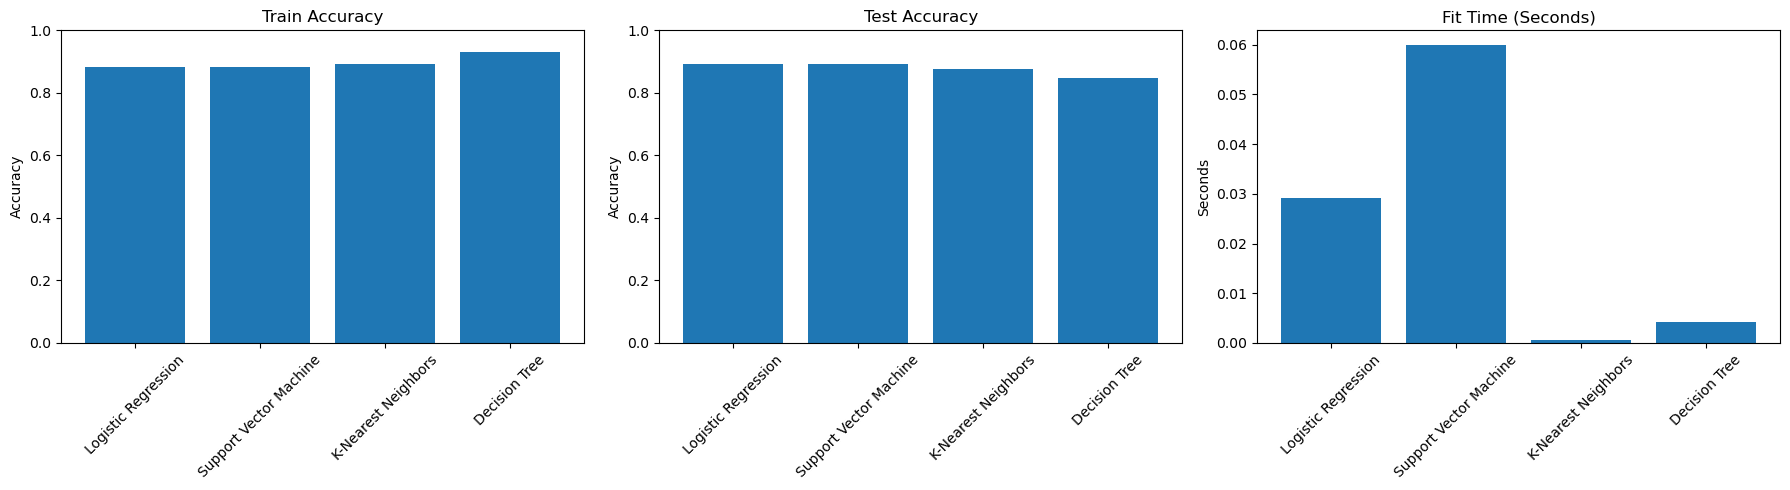

In [53]:
import matplotlib.pyplot as plt

#Setting up the figure
fig, axes = plt.subplots(1,3, figsize=(18,5))


# Plot Train Accuracy
axes[0].bar(results_df['Model'], results_df['Train Accuracy'])
axes[0].set_title('Train Accuracy')
axes[0].set_ylim(0,1)
axes[0].set_ylabel('Accuracy')
axes[0].tick_params(axis='x', rotation=45)

#Plot Test Accuracy
axes[1].bar(results_df['Model'], results_df['Test Accuracy'])
axes[1].set_title('Test Accuracy')
axes[1].set_ylim(0,1)
axes[1].set_ylabel('Accuracy')
axes[1].tick_params(axis='x', rotation=45)

#Plot Fit Time
axes[2].bar(results_df['Model'], results_df['Fit Time (s)'])
axes[2].set_title('Fit Time (Seconds)')
axes[2].set_ylabel('Seconds')
axes[2].tick_params(axis='x', rotation=45)

#Show the plot
plt.tight_layout()
plt.show()

### Problem 11: Improving the Model

Now that we have some basic models on the board, we want to try to improve these.  Below, we list a few things to explore in this pursuit.

- More feature engineering and exploration.  For example, should we keep the gender feature?  Why or why not?
- Hyperparameter tuning and grid search.  All of our models have additional hyperparameters to tune and explore.  For example the number of neighbors in KNN or the maximum depth of a Decision Tree.  
- Adjust your performance metric

In [ ]:
1. More Feature Engineering and Exploration
Example: Should we keep the gender feature? Why or why not?
In the current UCI Bank Marketing dataset, there is no explicit ‘gender’ feature — but if we had one, we’d evaluate its inclusion by:
	•	Checking for predictive power via correlation or feature importance.
	•	Ensuring ethical use and avoiding bias (gender-based decisions can lead to fairness concerns in financial services).
	•	If gender doesn’t significantly improve performance or raises ethical questions, it should be excluded.
Other feature ideas:
	•	Combine job and education into a “socio-economic score”.
	•	Bin age into age groups (e.g., 18–25, 26–40, etc.).
	•	Engineer new features like contact_rate = previous / pdays.



In [ ]:
2. Hyperparameter Tuning and Grid Search

Each model has important hyperparameters we can tune to improve performance:
	•	KNN:
	•	n_neighbors: Try values from 3 to 15.
	•	weights: uniform vs distance.
	•	Decision Tree:
	•	max_depth: Controls overfitting; try 3 to 20.
	•	min_samples_split, min_samples_leaf.
	•	Logistic Regression:
	•	Regularization: C (inverse of regularization strength).
	•	SVM:
	•	C: Margin hardness
	•	kernel: Try linear, rbf, poly
	•	gamma: For rbf and poly kernels.

Use GridSearchCV to systematically find the best combinations.

In [ ]:
3. Adjust Your Performance Metric

Since the dataset is imbalanced (most clients say “no” to term deposits), accuracy isn’t the best metric. Instead, consider:
	•	Precision: How many predicted “yes” are actually correct?
	•	Recall: How many actual “yes” did we correctly find?
	•	F1 Score: Balance between precision and recall.

Adjusting the evaluation metric will give you a better picture of performance, especially when predicting rare events like term deposit subscriptions.

In [55]:
from sklearn.model_selection import GridSearchCV

param_grid = {'n_neighbors': [3, 5, 7, 9, 11]}
grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)
grid.fit(X_train, y_train)

print("Best parameters:", grid.best_params_)
print("Best score:", grid.best_score_)

Best parameters: {'n_neighbors': 11}
Best score: 0.8830196465005387


##### Questions